In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import statistics
import time

from TREEplus import *

C:\Users\danie\AppData\Local\Temp\ipykernel_13796\3414905197.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#importing carseat dataset, have split 280 / 120

train = pd.read_csv("Carseats_train.csv")
test = pd.read_csv("Carseats_test.csv")

print(train.shape)

high_train = []

for i in range(train.shape[0]):
    if train["Sales"][i] > 8:
        high_train.append("Yes")
    else:
        high_train.append("No")

train["High"] = high_train
del train["Sales"]
#del train["Unnamed: 0"]

high_test = []

for i in range(test.shape[0]):
    if test["Sales"][i] > 8:
        high_test.append("Yes")
    else:
        high_test.append("No")

test["High"] = high_test
del test["Sales"]
#del test["Unnamed: 0"]

feature_var = "High"
num_var = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
cat_var = ["ShelveLoc", "Urban", "US", "High"]

train.head()

(280, 11)


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [3]:
train["High"]

print(Counter(train["High"]))
Counter(train["High"]).most_common(1)[0][1]

Counter({'No': 169, 'Yes': 111})


169

In [4]:
train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [5]:
y = train["High"]
print(len(y))
#train.drop(labels = "High", axis = 1, inplace = True)
cat_var = ["ShelveLoc", "Urban", "US"]

280


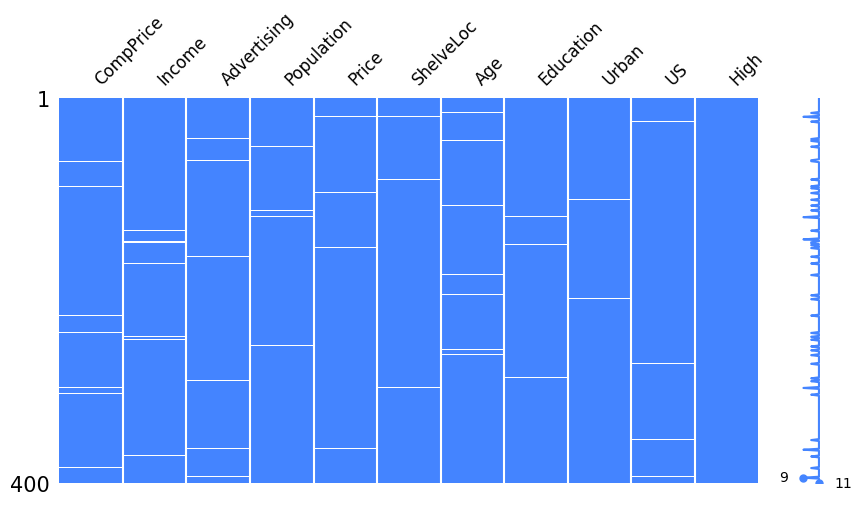

In [6]:
df = pd.concat([train, test], axis = 0)
df.reset_index(drop = True, inplace = True)

df_complete = df.copy()

import random
random.seed(142)
missing_values = 50
#10 columns, not the feature variable 
vars = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc", "Urban", "US"]

#vars = ["CompPrice", "Income", "ShelveLoc", "Urban"]

var_list = []
row_list = []
for i in range(missing_values):
    var_list.append( random.choice(vars)  )
    row_list.append( random.choice(range(0,400))  )


#impute missing values
for i in range(missing_values):
    df.loc[row_list[i], var_list[i]] = np.nan

import missingno
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


(400, 11)


,High,Urban,Education,Population,Price,ShelveLoc,US,Advertising,Age,CompPrice,Income
0,Yes,Yes,17.0,276.0,120.0,Bad,Yes,11.0,42.0,138.0,73.0
1,Yes,Yes,10.0,260.0,83.0,Good,Yes,16.0,65.0,111.0,48.0
2,Yes,Yes,12.0,269.0,80.0,Medium,Yes,10.0,59.0,113.0,35.0
3,No,Yes,14.0,466.0,97.0,Medium,Yes,4.0,55.0,117.0,100.0
4,No,Yes,13.0,340.0,128.0,Bad,No,3.0,38.0,141.0,64.0


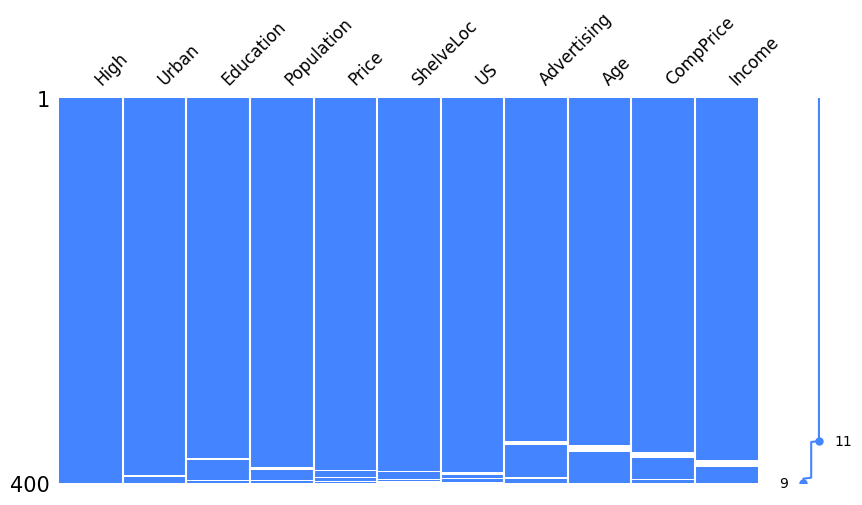

In [7]:
pd.options.mode.chained_assignment = None


bin_var = ["Urban", "US", "High"]
class_var = ["ShelveLoc"]


binpi = BINPI(df, num_var, bin_var, class_var, weak_learners = 7)
#id_matrix = binpi.id_matrix_creator()



df2 = binpi.lexicographical_matrix()

#dict_match = matches_dict(column_vect)

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));




print(df2.shape)
df2.head() 



In [12]:
df_binpi = binpi.binpi_imputation( )#df2,column_vect, num_var, bin_var, class_var, weak_learners = 7)

#issue for feature_var as categorical giving multiple splits - not a problem, for greater splits 


Feature Variable:  Advertising 
Missing Values:  50

Iteration 1
Split Found:  n1 [['US', 'No', 0.4588800450037943, 0]] start
node_proportion_total  0.4588800450037923
training mse 23.82

Iteration 2
Split Found:  n1 [['US', 'No', 0.5205779703252944, 0]] start
node_proportion_total  0.520577970325296
training mse 21.31

Iteration 3
Split Found:  n1 [['US', 'No', 0.48698606104921416, 0]] start
node_proportion_total  0.4869860610492124
training mse 22.5

Iteration 4
Split Found:  n1 [['US', 'No', 0.5210583135316236, 0]] start
node_proportion_total  0.5210583135316216
training mse 21.39

Iteration 5
Split Found:  n1 [['US', 'No', 0.5586361235445554, 0]] start
node_proportion_total  0.5586361235445544
training mse 20.49

Iteration 6
Split Found:  n1 [['US', 'No', 0.54862793304303, 0]] start
node_proportion_total  0.5486279330430316
training mse 20.88

Iteration 7
Split Found:  n1 [['US', 'No', 0.5302107613881881, 0]] start
node_proportion_total  0.5302107613881882
training mse 21.77
Final

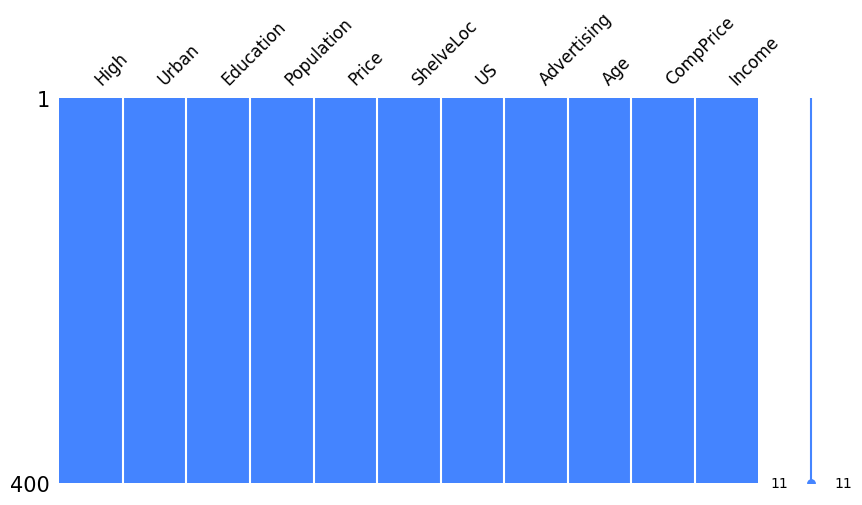

In [13]:
missingno.matrix(df_binpi, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


In [14]:
predicted = []
real = []
predictors = []
for i in range(missing_values):
    print(df_binpi.loc[row_list[i], var_list[i]], df_complete.loc[row_list[i], var_list[i]])
    predicted.append(df_binpi.loc[row_list[i], var_list[i]])
    real.append(df_complete.loc[row_list[i], var_list[i]])
    predictors.append(var_list[i])

df_result_binpi = pd.DataFrame(
    {'Predictor':predictors,
     'Real Value': real,
     'Predicted Value BINPI': predicted
    })

Yes Yes
Medium Bad
Bad Bad
56.5440174604328 80
117.11064673583445 121
78.23463839838061 120
0.607281521968049 0
Yes Yes
Yes Yes
116.412757681331 124
359.30459172294906 341
45.10361053642882 73
56.5440174604328 69
61.900012908576336 114
61.900012908576336 42
10.276218342420236 16
116.412757681331 107
14.137470908913652 15
45.10361053642882 37
78.23463839838061 84
104.96819928321399 131
45.10361053642882 76
116.412757681331 98
314.2803316921 477
10.594463522754848 0
78.23463839838061 106
116.412757681331 97
102.80482105765435 69
0.607281521968049 0
131.501661943094 138
216.52404642644285 125
111.32935821664358 127
Yes Yes
243.03856591969787 202
No No
10.594463522754848 12
78.23463839838061 105
56.5440174604328 43
56.5440174604328 54
10.389001995286625 10
0.607281521968049 0
120.62475994042539 116
No Yes
14.436901488409312 11
14.436901488409312 13
Medium Medium
Medium Medium
78.23463839838061 81
131.501661943094 122
Yes Yes


In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

df_result_binpi.style.hide()

Predictor,Real Value,Predicted Value BINPI
US,Yes,Yes
ShelveLoc,Bad,Medium
ShelveLoc,Bad,Bad
Age,80,56.544017
Price,121,117.110647
Income,120,78.234638
Advertising,0,0.607282
Urban,Yes,Yes
US,Yes,Yes
CompPrice,124,116.412758


Sklearn Comparison

Sklearn uses 50 estimators though, but for time reasons this will be compared with 7 

resetting df2, as it is what is returned from the impuattion 

Include imputation_process_sklearn function from before (datamining)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

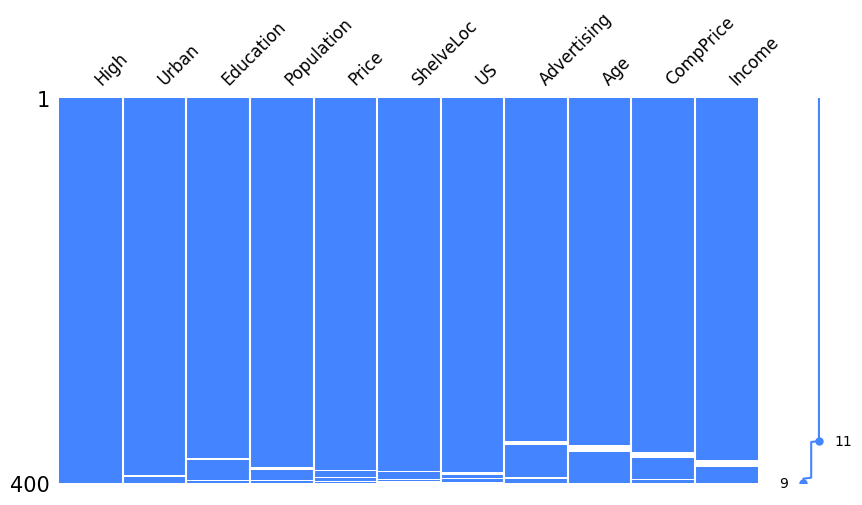

In [17]:
binpi = BINPI(df, num_var, bin_var, class_var, weak_learners = 7)
df2 = binpi.lexicographical_matrix()

#id_matrix = id_matrix_creator(df)
#df2, column_vect = lexicographical_matrix(df, id_matrix)

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

In [18]:
df2.isna().sum().sum()


50

In [19]:
df2.head()

,High,Urban,Education,Population,Price,ShelveLoc,US,Advertising,Age,CompPrice,Income
0,Yes,Yes,17.0,276.0,120.0,Bad,Yes,11.0,42.0,138.0,73.0
1,Yes,Yes,10.0,260.0,83.0,Good,Yes,16.0,65.0,111.0,48.0
2,Yes,Yes,12.0,269.0,80.0,Medium,Yes,10.0,59.0,113.0,35.0
3,No,Yes,14.0,466.0,97.0,Medium,Yes,4.0,55.0,117.0,100.0
4,No,Yes,13.0,340.0,128.0,Bad,No,3.0,38.0,141.0,64.0


In [20]:
df2.replace("Yes", 1, inplace = True)
df2.replace("No", 0, inplace = True)
df2.replace("Good", 3, inplace = True)
df2.replace("Medium", 2, inplace = True)
df2.replace("Bad", 1, inplace = True)

In [21]:
df_sklearn = binpi.binpi_imputation( sklearn = True)


Feature Variable:  Advertising 
Missing Values:  50
imp time 0.04888153076171875
time 0.05620288848876953

Feature Variable:  Advertising 
Missing Values:  49
imp time 0.0010287761688232422
time 0.0073664188385009766

Feature Variable:  Advertising 
Missing Values:  48
imp time 0.0013804435729980469
time 0.00905752182006836

Feature Variable:  Advertising 
Missing Values:  47
imp time 0.0
time 0.0025327205657958984

Feature Variable:  Advertising 
Missing Values:  46
imp time 0.009937047958374023
time 0.009937047958374023

Feature Variable:  Age 
Missing Values:  45
imp time 0.03447294235229492
time 0.040601253509521484

Feature Variable:  Age 
Missing Values:  44
imp time 0.0
time 0.0030622482299804688

Feature Variable:  Age 
Missing Values:  43
imp time 0.001995086669921875
time 0.007146358489990234

Feature Variable:  Age 
Missing Values:  42
imp time 0.0015075206756591797
time 0.004506826400756836

Feature Variable:  Age 
Missing Values:  41
imp time 0.0011601448059082031
time 0.

imp time 0.03042292594909668
time 0.03297615051269531

Feature Variable:  Price 
Missing Values:  19
imp time 0.002705097198486328
time 0.010582923889160156

Feature Variable:  ShelveLoc 
Missing Values:  18
imp time 0.035958051681518555
time 0.03928327560424805

Feature Variable:  US 
Missing Values:  17
imp time 0.03270840644836426
time 0.03475165367126465

Feature Variable:  US 
Missing Values:  16
imp time 0.004215240478515625
time 0.009637117385864258

Feature Variable:  US 
Missing Values:  15
imp time 0.0035507678985595703
time 0.006766796112060547

Feature Variable:  Urban 
Missing Values:  14
imp time 0.03440523147583008
time 0.04300522804260254

Feature Variable:  Urban 
Missing Values:  13
imp time 0.010363101959228516
time 0.010363101959228516
imp time 0.10368084907531738
time 0.10468101501464844

Feature Variable:  Advertising 
Missing Values:  11
imp time 0.04494976997375488
time 0.049469709396362305
imp time 0.04347658157348633
time 0.056975364685058594

Feature Variable

Comparison

In [24]:
predicted = []
real = []
predictors = []
for i in range(missing_values):
    #print(df2.loc[row_list[i], var_list[i]], df_complete.loc[row_list[i], var_list[i]])
    predicted.append(df_sklearn.loc[row_list[i], var_list[i]])
    #real.append(df_complete.loc[row_list[i], var_list[i]])
    #predictors.append(var_list[i])

In [25]:
df_result_binpi["Predicted Value Sklearn"] = predicted

In [26]:
practiceboy = df_result_binpi.copy()

In [27]:
for i in range(missing_values):
    if practiceboy.loc[i, "Predictor"] in ["US", "Urban"]:
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 0: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "No"
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 1: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "Yes"
    elif practiceboy.loc[i, "Predictor"] in ["ShelveLoc"]:
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 1: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "Bad"
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 2: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "Medium"
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 3: 
            practiceboy.loc[i, "Predicted Value Sklearn"] =  "Good"


In [28]:
practiceboy.style.hide()

Predictor,Real Value,Predicted Value BINPI,Predicted Value Sklearn
US,Yes,Yes,Yes
ShelveLoc,Bad,Medium,Medium
ShelveLoc,Bad,Bad,Medium
Age,80,56.544017,50.850467
Price,121,117.110647,107.750000
Income,120,78.234638,71.605263
Advertising,0,0.607282,0.368421
Urban,Yes,Yes,Yes
US,Yes,Yes,Yes
CompPrice,124,116.412758,119.866667


In [29]:
#cat_var = ["ShelveLoc", "Urban", "US"]

missclass_binpi = 0 
missclass_sklearn = 0 
total = 0
for i in range(missing_values):
    if practiceboy.loc[i, "Predictor"] in cat_var:
        total +=1
        if practiceboy.loc[i, "Real Value"] != practiceboy.loc[i, "Predicted Value BINPI"]:
            missclass_binpi += 1
        if practiceboy.loc[i, "Real Value"] != practiceboy.loc[i, "Predicted Value Sklearn"]:
            missclass_sklearn += 1
missclass_binpi, missclass_sklearn, total

(2, 3, 11)

In [30]:
#num_var

mse_binpi = 0
mse_sklearn = 0 
total = 0 

for i in range(missing_values):
    if practiceboy.loc[i, "Predictor"] in num_var:
        total +=1
        mse_binpi += (practiceboy.loc[i, "Real Value"] - practiceboy.loc[i, "Predicted Value BINPI"])**2
        #if practiceboy.loc[i, "Real Value"] != practiceboy.loc[i, "Predicted Value Sklearn"]:
        mse_sklearn += (practiceboy.loc[i, "Real Value"] - practiceboy.loc[i, "Predicted Value Sklearn"])**2

        print("real", practiceboy.loc[i, "Real Value"], "pred cartplus", practiceboy.loc[i, "Predicted Value BINPI"], "mse1", (practiceboy.loc[i, "Real Value"] - practiceboy.loc[i, "Predicted Value BINPI"])**2, "msetot", mse_binpi) 
        print("real", practiceboy.loc[i, "Real Value"], "sklearn", practiceboy.loc[i, "Predicted Value Sklearn"], "mse2", (practiceboy.loc[i, "Real Value"] - practiceboy.loc[i, "Predicted Value Sklearn"])**2 , "msetot2", mse_sklearn)
mse_binpi/total, mse_sklearn/total, total

real 80 pred cartplus 56.5440174604328 mse1 550.1831168964815 msetot 550.1831168964815
real 80 sklearn 50.850467289719624 mse2 849.6952572277056 msetot2 849.6952572277056
real 121 pred cartplus 117.11064673583445 mse1 15.127068813475216 msetot 565.3101857099567
real 121 sklearn 107.75 mse2 175.5625 msetot2 1025.2577572277055
real 120 pred cartplus 78.23463839838061 mse1 1744.3454297140233 msetot 2309.65561542398
real 120 sklearn 71.60526315789474 mse2 2342.05055401662 msetot2 3367.3083112443255
real 0 pred cartplus 0.607281521968049 mse1 0.36879084692382996 msetot 2310.024406270904
real 0 sklearn 0.3684210526315789 mse2 0.13573407202216065 msetot2 3367.444045316348
real 124 pred cartplus 116.412757681331 mse1 57.56624600220172 msetot 2367.5906522731057
real 124 sklearn 119.86666666666666 mse2 17.0844444444445 msetot2 3384.5284897607926
real 341 pred cartplus 359.30459172294906 mse1 335.0580781438551 msetot 2702.648730416961
real 341 sklearn 290.5 mse2 2550.25 msetot2 5934.778489760793


(1261.7987225871243, 2683.810189851849, 39)